In [336]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
###Helper Functions
def single_feature_plot(reshaped_features):
    X = reshaped_features
    plt.scatter(list(range(0, 19)), X[list(range(0, 19))])
    plt.scatter(list(range(19, 38)), X[list(range(19, 38))])
    plt.ylabel("feature")
    plt.xlabel("Measure")
    plt.title("Training Set (First LED)")
    plt.show()
    plt.scatter(list(range(0, 19)), y[list(range(0, 19))])
    plt.scatter(list(range(19, 38)), y[list(range(19, 38))])
    plt.title("Label Set")
    plt.ylabel("Label value")
    plt.xlabel("Measure")
    plt.show()
    
def features_plot(features):
    xx = features
    fbx_values = np.zeros([int((xx.shape[0])/2), xx.shape[1]])
    fby_values = np.zeros([int((xx.shape[0])/2), xx.shape[1]])
    j = 0; k = 0
    for i in range(xx.shape[0]):
        if i % 2 == 0:
            fbx_values[j, :] = xx[i, :]
            j += 1
        if i % 2 != 0:
            fby_values[k, :] = xx[i, :]
            k += 1
    fbx_values.reshape(-1, 1)
    fby_values.reshape(-1, 1)
    plt.scatter(list(range(fbx_values.reshape(-1, 1).shape[0])), fbx_values)
    plt.scatter(list(range(fby_values.reshape(-1, 1).shape[0])), fby_values)
    plt.ylabel("feature")
    plt.xlabel("Measure")
    plt.title("Training Set (Full set)")
    plt.show() 

Data Handling

In [337]:
###Features
data = pd.read_excel('./2_Results/Target.xlsx', header=None).iloc[3:, 1:20]
data = data.reset_index(drop=True) #Resets the rows index to start in zero again
data.columns = range(data.shape[1]) #Resets the columns index to start in zero again
data = data.values #Extract the values as a ndarray
print(data.shape)
###Labels
ones = np.ones(data.shape[1])
ones = np.expand_dims(ones, axis=0)
labels = np.zeros([data.shape[0], data.shape[1]])
for i in range(labels.shape[0]):
    if i % 2 != 0:
        labels[i, :] = ones
###Save data
features_path = './3_Extra/training_data/Classification_for_fibers.npy'
labes_path = './3_Extra/training_data/fibers_labels.npy'
np.save(features_path, data)
np.save(labes_path, labels)

(24, 19)


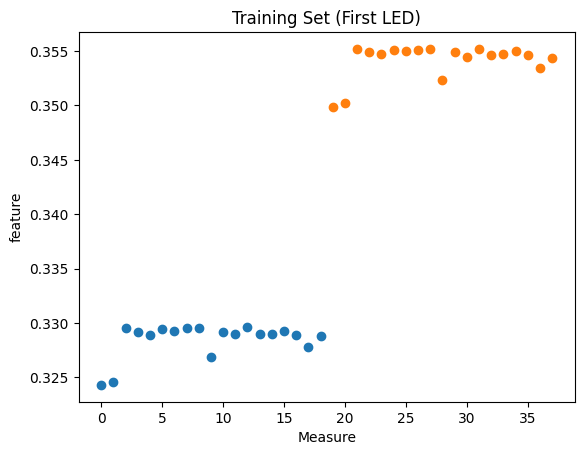

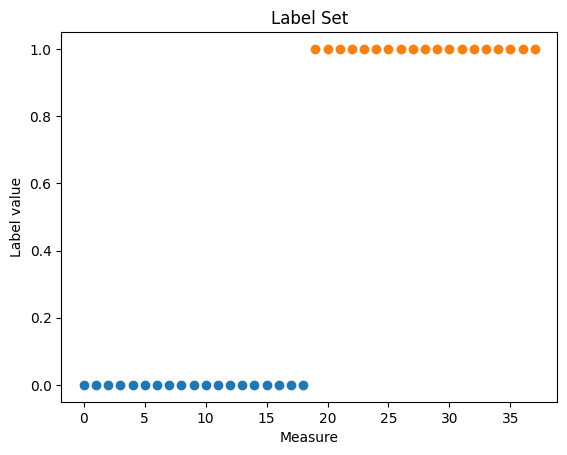

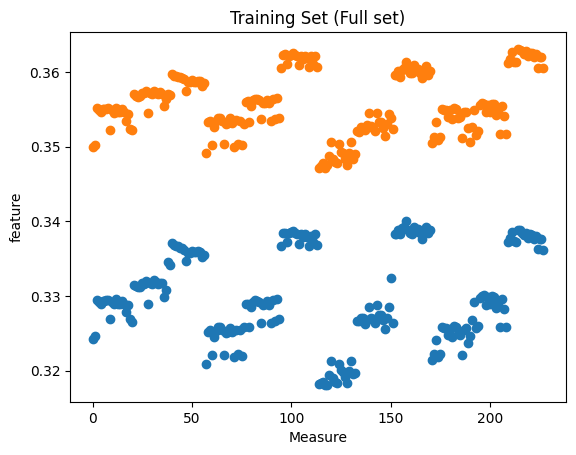

In [338]:
###Data loading and reshaping
X = np.load(features_path).reshape(-1, 1)
y = np.load(labes_path).reshape(-1, 1)
y = y.ravel()
###Data plotting
#Single pair of fbx, fby features and labels
single_feature_plot(X)
#Full dataset plotting
xx = np.load(features_path)
features_plot(xx)

Logistic Regression with one feature

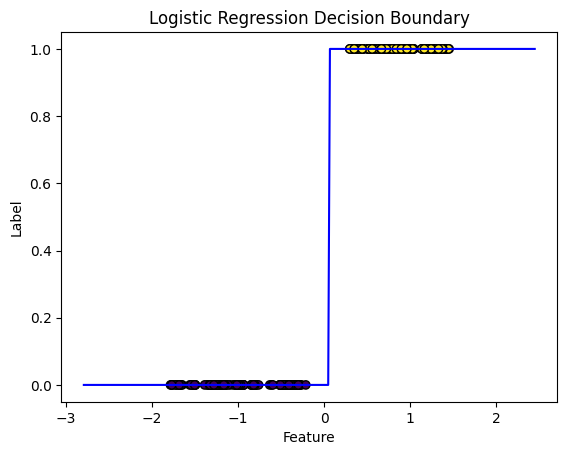

In [339]:
###Training
#Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Create and train the model
classifier = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
classifier.fit(X_train, y_train)
x_min, x_max = X.min() - 1, X.max() + 1
xx = np.arange(x_min, x_max, 0.02).reshape(-1, 1) #Independent array that covers all values to be predicted 
Z = classifier.predict(xx)
plt.plot(xx, Z, color='blue')
plt.scatter(X_train, y_train, c=y_train, edgecolors='k')
plt.xlabel('Feature')
plt.ylabel('Label')
plt.title('Logistic Regression Decision Boundary')
plt.show()

In [340]:
###Testing
#PRedict and compare values of the test set
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [341]:
#Get the parameters of the model
weights = classifier.coef_
bias = classifier.intercept_
print("Weights:", weights[0][0])
print("Bias:", bias[0])

Weights: 5.295263774740182
Bias: -0.3311917204180728


Logistic Regression with two features (Measure and measure number)

Crossvalidation method

In [342]:
classifier2 = LogisticRegression()
cv_scores = cross_val_score(classifier2, X, y, cv=5)  # 5-fold cross-validation
classifier2.fit(X, y)
print("Accuracy scores for each fold:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Standard deviation:", np.std(cv_scores))
classifier_score = classifier2.score(X, y)

Accuracy scores for each fold: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0
Standard deviation: 0.0


In [343]:
import inspect
source_code = inspect.getsource(StandardScaler)
print(source_code)

class StandardScaler(OneToOneFeatureMixin, TransformerMixin, BaseEstimator):
    """Standardize features by removing the mean and scaling to unit variance.

    The standard score of a sample `x` is calculated as:

        z = (x - u) / s

    where `u` is the mean of the training samples or zero if `with_mean=False`,
    and `s` is the standard deviation of the training samples or one if
    `with_std=False`.

    Centering and scaling happen independently on each feature by computing
    the relevant statistics on the samples in the training set. Mean and
    standard deviation are then stored to be used on later data using
    :meth:`transform`.

    Standardization of a dataset is a common requirement for many
    machine learning estimators: they might behave badly if the
    individual features do not more or less look like standard normally
    distributed data (e.g. Gaussian with 0 mean and unit variance).

    For instance many elements used in the objective function of
    a 